In [3]:
pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.5 MB/s eta 0:00:00


In [10]:
pip install mthree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.7 MB/s eta 0:00:00


Original Counts: {'000': 509, '111': 491}
Mitigated Counts: {'111': 0.491, '000': 0.509}


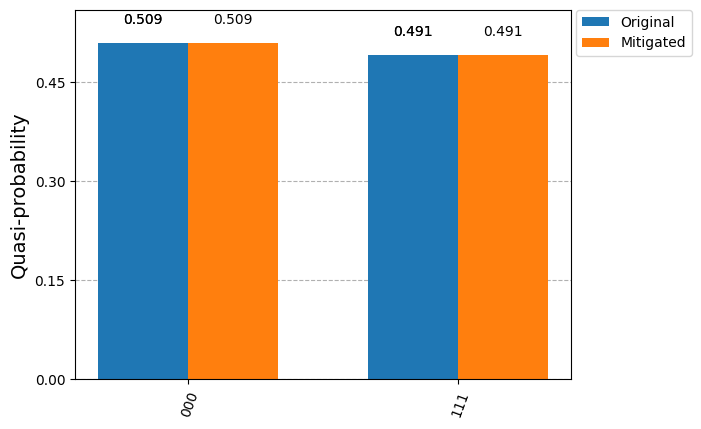

In [12]:
# Import necessary modules from Qiskit and mthree
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import mthree

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT from qubit 0 to 1
qc.cx(0, 2)    # CNOT from qubit 0 to 2
qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits

# Transpile the circuit for the backend
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the circuit directly using BackendV2 (no need for assemble)
job = backend.run(transpiled_qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Print original (noisy) measurement results
print(f"Original Counts: {counts}")

# Initialize mthree mitigator and calibrate for qubits [0, 1, 2]
mitigator = mthree.M3Mitigation(backend)
mitigator.cals_from_system([0, 1, 2])

# Apply measurement error mitigation
mitigated_counts = mitigator.apply_correction(counts, qubits=[0, 1, 2]).nearest_probability_distribution()

# Print mitigated counts
print(f"Mitigated Counts: {mitigated_counts}")

# Plot histograms for original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])